# Laboratorium 3
# **Zadanie 1:** Analiza brakujących danych

**Cel:** Zidentyfikować, które kolumny zawierają braki danych oraz ocenić ich zakres. \

**Kroki:**
1. Wczytaj dane z pliku covidtotals.csv.
2. Wyświetl podstawowe informacje o danych (np. typy zmiennych, liczba
obserwacji).
3. Zidentyfikuj kolumny z brakującymi wartościami i oblicz liczbę oraz
procent braków w każdej z nich.
4. Stwórz wykres słupkowy przedstawiający rozkład braków danych.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iso_code         209 non-null    object 
 1   lastdate         209 non-null    object 
 2   location         209 non-null    object 
 3   total_cases      209 non-null    float64
 4   total_deaths     209 non-null    float64
 5   total_cases_pm   209 non-null    float64
 6   total_deaths_pm  209 non-null    float64
 7   population       209 non-null    float64
 8   pop_density      198 non-null    float64
 9   median_age       185 non-null    float64
 10  gdp_per_capita   182 non-null    float64
 11  hosp_beds        164 non-null    float64
 12  region           209 non-null    object 
dtypes: float64(9), object(4)
memory usage: 21.4+ KB
None
Brakujące wartości w każdej kolumnie:
iso_code            0
lastdate            0
location            0
total_cases         0
total_deaths        0

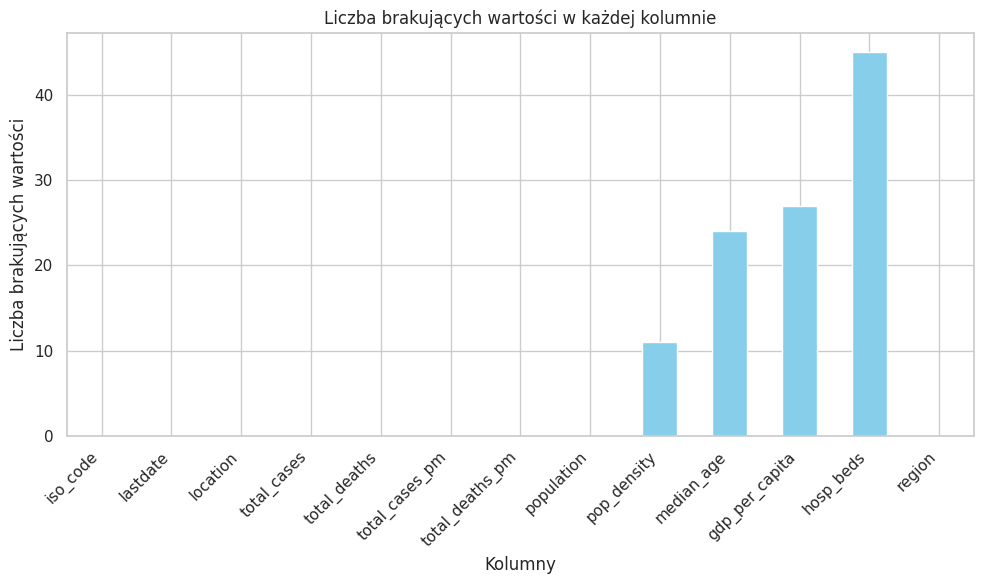

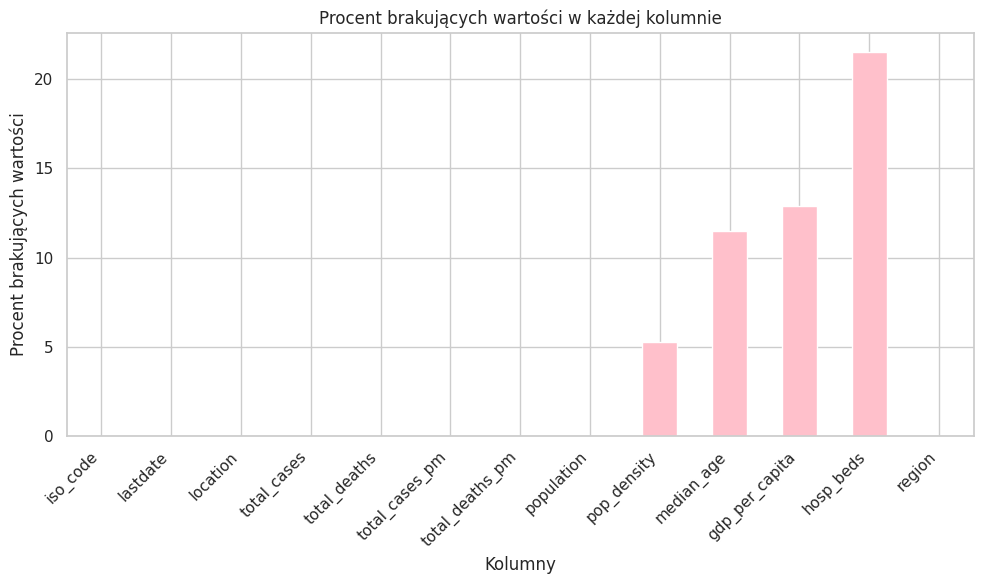

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytywanie danych z pliku csv
df = pd.read_csv('covidtotals.csv')

# Wyświetlenie podstawowych informacji o danych
print(df.info())

# Identyfikacja kolumn z brakującymi wartościami i obliczenie sumy wraz z procentem w każdej z nich
missing_values = df.isnull().sum()
missing_values_proc = (df.isnull().sum() / len(df)) * 100

print("Brakujące wartości w każdej kolumnie:")
print(missing_values)

print("Procent brakujących wartości w każdej kolumnie:")
print(missing_values_proc)

# Wykres słupkowy dla liczby brakujących wartości
plt.figure(figsize = (10,6))
missing_values.plot(kind = 'bar', color = 'skyblue')
plt.title("Liczba brakujących wartości w każdej kolumnie")
plt.xlabel("Kolumny")
plt.ylabel("Liczba brakujących wartości")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# Wykres słupkowy dla procent brakujących wartości
plt.figure(figsize = (10,6))
missing_values_proc.plot(kind = 'bar', color = 'pink')
plt.title("Procent brakujących wartości w każdej kolumnie")
plt.xlabel("Kolumny")
plt.ylabel("Procent brakujących wartości")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# **Zadanie 2:** Imputacja prostą wartością
**Cel:** Uzupełnić braki danych w kolumnach numerycznych przy użyciu metod
statystycznych.

**Kroki:**
1. Znajdź kolumny numeryczne, które zawierają braki.
2. Wybierz dwie z nich i oblicz średnią oraz medianę dla tych kolumn.
3. Zastosuj imputację – uzupełnij braki wartością średnią lub medianą
(możesz porównać obie metody).
4. Porównaj statystyki (np. średnią, odchylenie standardowe) przed i po
imputacji, aby ocenić wpływ tej operacji.

Brakujące wartości w każdej kolumnie:
iso_code            0
lastdate            0
location            0
total_cases         0
total_deaths        0
total_cases_pm      0
total_deaths_pm     0
population          0
pop_density        11
median_age         24
gdp_per_capita     27
hosp_beds          45
region              0
dtype: int64

Średnia dla 'hosp_beds': 3.012670731707317
Średnia dla 'median_age': 30.55135135135135
Mediana dla 'hosp_beds': 2.3585
Mediana dla 'median_age': 29.9

Statystyki oryginalnej kolumny 'hosp_beds':
count    164.000000
mean       3.012671
std        2.464917
min        0.100000
25%        1.300000
50%        2.358500
75%        3.895750
max       13.800000
Name: hosp_beds, dtype: float64

Statystyki po imputacji średnią:
count    209.000000
mean       3.012671
std        2.182049
min        0.100000
25%        1.500000
50%        3.000000
75%        3.400000
max       13.800000
Name: hosp_beds_srednia, dtype: float64

Statystyki po imputacji medianą:
count  

<ipython-input-28-05e4d518b11a>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Oryginalne', 'Po imputacji (Średnia)', 'Po imputacji (Mediana)'])
<ipython-input-28-05e4d518b11a>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Oryginalne', 'Po imputacji (Średnia)', 'Po imputacji (Mediana)'])


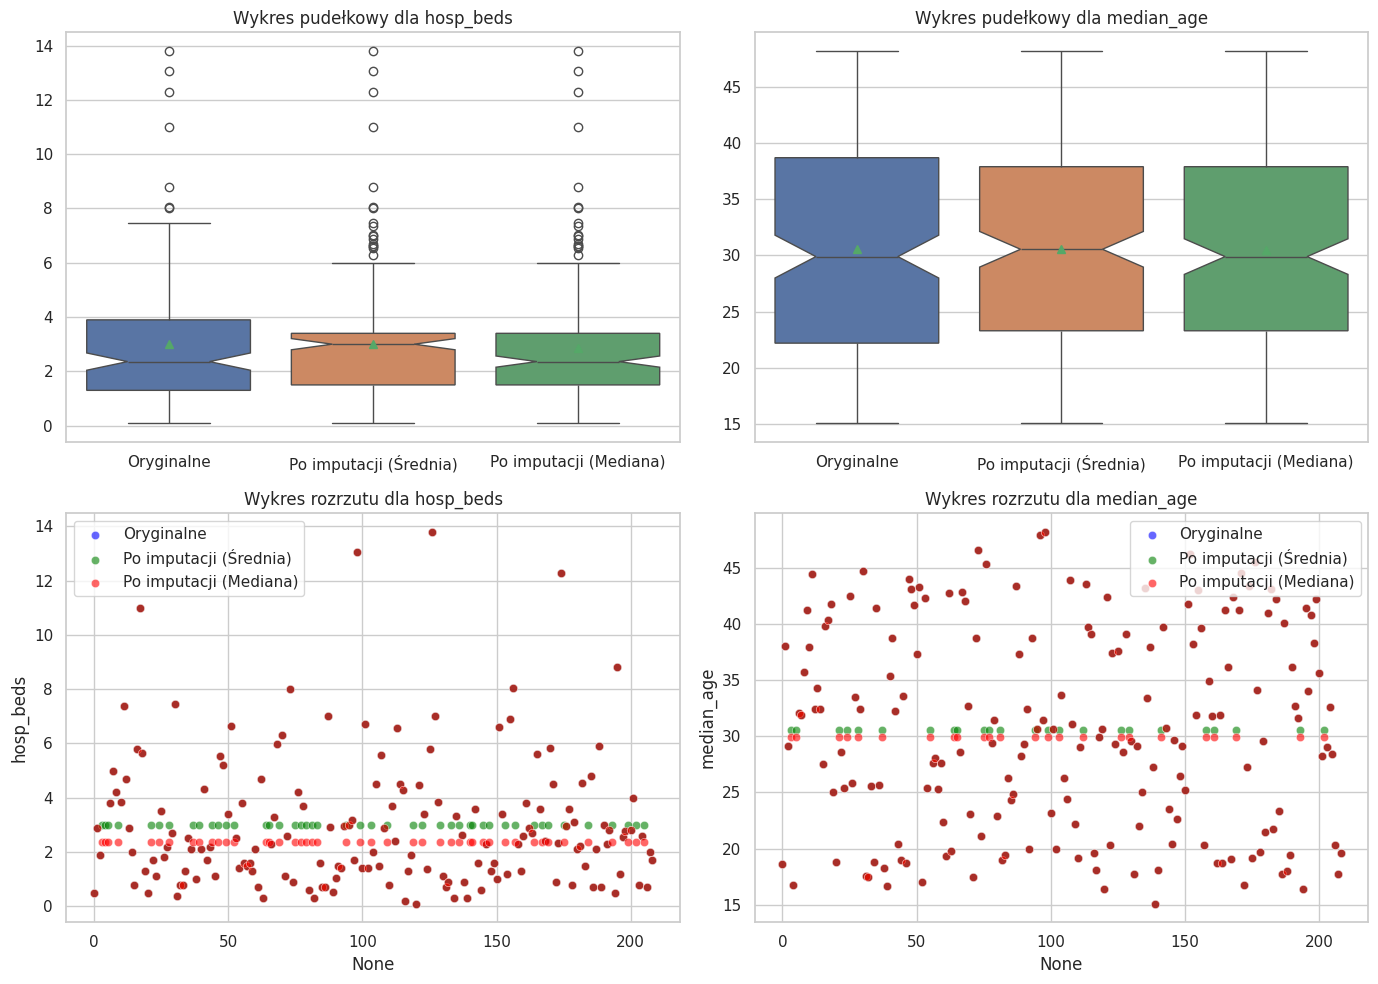

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Znalezienie i wyświetlenie kolumn zawierających braki
missing_values = df.isnull().sum()
print("Brakujące wartości w każdej kolumnie:")
print(missing_values)

# Obliczanie średniej i mediany dla wybranych kolumn - hosp_beds oraz median_age
hosp_beds_mean = df['hosp_beds'].mean()
median_age_mean = df['median_age'].mean()

hosp_beds_median = df['hosp_beds'].median()
median_age_median = df['median_age'].median()

print(f"\nŚrednia dla 'hosp_beds': {hosp_beds_mean}")
print(f"Średnia dla 'median_age': {median_age_mean}")
print(f"Mediana dla 'hosp_beds': {hosp_beds_median}")
print(f"Mediana dla 'median_age': {median_age_median}")

# Imputacja - uzupełnienie braków wartością średnią lub medianą
df['hosp_beds_srednia'] = df['hosp_beds'].fillna(df['hosp_beds'].mean())
df['median_age_srednia'] = df['median_age'].fillna(df['median_age'].mean())

df['hosp_beds_median'] = df['hosp_beds'].fillna(df['hosp_beds'].median())
df['median_age_median'] = df['median_age'].fillna(df['median_age'].median())

# Porównanie statystyk przed i po imputacji
print("\nStatystyki oryginalnej kolumny 'hosp_beds':")
print(df['hosp_beds'].describe())
print("\nStatystyki po imputacji średnią:")
print(df['hosp_beds_srednia'].describe())

print("\nStatystyki po imputacji medianą:")
print(df['hosp_beds_median'].describe())

print("\nStatystyki oryginalnej kolumny 'median_age':")
print(df['median_age'].describe())
print("\nStatystyki po imputacji średnią:")
print(df['median_age_srednia'].describe())

print("\nStatystyki po imputacji medianą:")
print(df['median_age_median'].describe())

# Ustawienie stylu wykresów
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Wykres pudełkowy dla 'hosp_beds' przed i po imputacji średnią i medianą
sns.boxplot(data=[df['hosp_beds'], df['hosp_beds_srednia'], df['hosp_beds_median']],
            ax=axes[0, 0],
            notch=True,
            patch_artist=True,
            showmeans=True)
axes[0, 0].set_xticklabels(['Oryginalne', 'Po imputacji (Średnia)', 'Po imputacji (Mediana)'])
axes[0, 0].set_title('Wykres pudełkowy dla hosp_beds')

# Wykres pudełkowy dla 'median_age' przed i po imputacji średnią i medianą
sns.boxplot(data=[df['median_age'], df['median_age_srednia'], df['median_age_median']],
            ax=axes[0, 1],
            notch=True,
            patch_artist=True,
            showmeans=True)
axes[0, 1].set_xticklabels(['Oryginalne', 'Po imputacji (Średnia)', 'Po imputacji (Mediana)'])
axes[0, 1].set_title('Wykres pudełkowy dla median_age')

# Wykres rozrzutu (scatterplot) dla 'hosp_beds' przed i po imputacji średnią i medianą
sns.scatterplot(x=df.index, y=df['hosp_beds'], label='Oryginalne', color='blue', alpha=0.6, ax=axes[1, 0])
sns.scatterplot(x=df.index, y=df['hosp_beds_srednia'], label='Po imputacji (Średnia)', color='green', alpha=0.6, ax=axes[1, 0])
sns.scatterplot(x=df.index, y=df['hosp_beds_median'], label='Po imputacji (Mediana)', color='red', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Wykres rozrzutu dla hosp_beds')

# Wykres rozrzutu (scatterplot) dla 'median_age' przed i po imputacji średnią i medianą
sns.scatterplot(x=df.index, y=df['median_age'], label='Oryginalne', color='blue', alpha=0.6, ax=axes[1, 1])
sns.scatterplot(x=df.index, y=df['median_age_srednia'], label='Po imputacji (Średnia)', color='green', alpha=0.6, ax=axes[1, 1])
sns.scatterplot(x=df.index, y=df['median_age_median'], label='Po imputacji (Mediana)', color='red', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Wykres rozrzutu dla median_age')

axes[1, 0].legend()
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# **Zadanie 3:** Identyfikacja wartości odstających i nieoczekiwanych w relacjach pomiędzy dwiema zmiennymi:Wygeneruj macierz korelacji dla danych totvars i demovars. #
**Cel:** Identyfikacja wartości odstających oraz nieoczekiwanych relacji pomiędzy dwiema zmiennymi.

**Kroki:**
1. Przypisz do zmiennej "covidtotalsonly" wybrane kolumny z ramki
danych "covidtotals". Użyj metody "loc" wraz z dwukropkiem, aby
wybrać wszystkie wiersze oraz kolumny zdefiniowane w liście "totvars".
2. Utwórz nową kolumnę 'total_cases_q' w ramce danych
"covidtotalsonly". Podziel kolumnę "total_cases" na pięć przedziałów
kwantylowych. Przypisz etykiety 'very low', 'low', 'medium', 'high' i 'very
high' odpowiednio do każdego przedziału. Określ precyzję podziału na
0, Wykorzystaj odpowiednią metodą z biblioteki pandas.
3. Utwórz nową kolumnę 'total_deaths_q' w ramce danych
"covidtotalsonly". Podziel kolumnę "total_cases" na pięć przedziałów
kwantylowych. Przypisz etykiety 'very low', 'low', 'medium', 'high' i 'very
high' odpowiednio do każdego przedziału. Określ precyzję podziału na
0, Wykorzystaj odpowiednią metodą z biblioteki pandas.
4. Wygeneruj tabelę przestawną (krzyżową) na podstawie kolumn
"total_cases_q" i "total_deaths_q" z ramki danych "covidtotalsonly".
5. Użyj metody "loc" w ramce danych "covidtotals" w celu wybrania
wierszy, gdzie kolumna "total_cases_q" ma wartość "very high" i
kolumna "total_deaths_q" ma wartość "medium". Wykonaj transpozycję
macierzy.
6. Użyj metody "loc" w ramce danych "covidtotals" w celu wybrania
wierszy, gdzie kolumna "total_cases_q" ma wartość "low" i kolumna
"total_deaths_q" ma wartość "high". Wykonaj transpozycję macierzy.
7. Oblicz średnią wartość kolumny "hosp_beds" w ramce danych
"covidtotals".
8. Za pomocą funkcji regplot wygeneruj wykres regresji.Określ, że oś X
będzie zawierać dane z kolumny "total_cases", a oś Y dane z kolumny
"total_deaths" z ramki danych "covidtotals". Nadaj odpowiednie etykiety
dla osi X i Y. Nadaj wykresowi odpowiedni tytuł.
9. Użyj metody "loc" w ramce danych "covidtotals", aby wybrać wiersze,
gdzie kolumna "total_cases" zawiera wartości mniejsze niż 300 000 i
kolumna "total_deaths" zawiera wartości większe niż 20 000. Wykonaj
transpozycję macierzy.
10.Użyj metody "loc" w ramce danych "covidtotals", aby wybrać wiersze,
gdzie kolumna "total_cases" zawiera wartości większe niż 300 000 i
kolumna "total_deaths" zawiera wartości mniejsze niż 10 000. Wykonaj
transpozycję macierzy.
11. Za pomocą funkcji regplot wygeneruj wykres regresji. Określ, że oś X
będzie zawierać dane z kolumny "total_cases_pm", a oś Y dane z
kolumny "total_deaths_pm" z ramki danych "covidtotals". Nadaj
odpowiednie etykiety dla osi X i Y. Nadaj wykresowi odpowiedni tytuł

           location  total_cases  total_deaths  total_cases_pm  \
0       Afghanistan      34451.0        1010.0         884.985   
1           Albania       3371.0          89.0        1171.381   
2           Algeria      18712.0        1004.0         426.717   
3           Andorra        855.0          52.0       11065.812   
4            Angola        483.0          25.0          14.696   
..              ...          ...           ...             ...   
204         Vietnam        370.0           0.0           3.801   
205  Western Sahara        519.0           1.0         868.866   
206           Yemen       1389.0         365.0          46.570   
207          Zambia       1895.0          42.0         103.079   
208        Zimbabwe        982.0          18.0          66.070   

     total_deaths_pm  population  pop_density  median_age  hosp_beds  
0             25.945  38928341.0       54.422        18.6       0.50  
1             30.926   2877800.0      104.871        38.0       2

<ipython-input-26-32cf18fd0581>:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(covidtotalsonly,


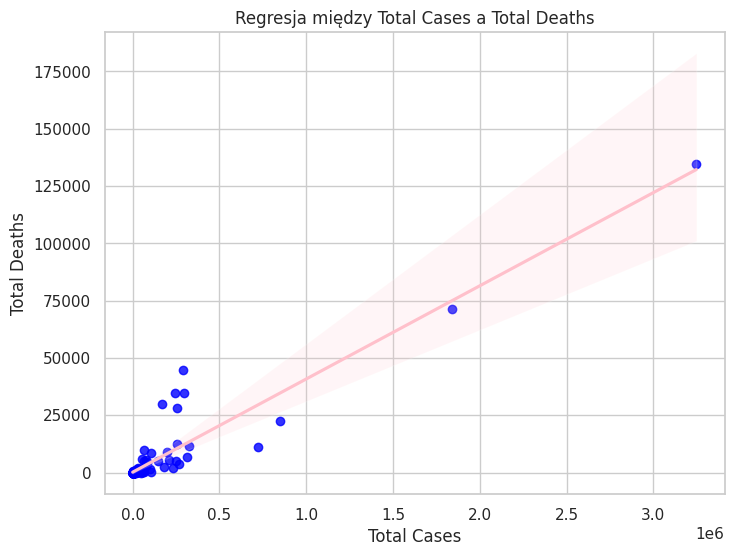

Transponowane dane (total_cases < 300000 i total_deaths > 20000):
                        68          96           124         176  \
location             France       Italy       Mexico       Spain   
total_cases        170752.0    242827.0     295268.0    253908.0   
total_deaths        30004.0     34945.0      34730.0     28403.0   
total_cases_pm     2615.946    4016.203     2290.093    5430.632   
total_deaths_pm     459.666     577.968      269.365     607.489   
population       65273512.0  60461828.0  128932753.0  46754783.0   
pop_density         122.578     205.859       66.444      93.105   
median_age             42.0        47.9         29.3        45.5   
hosp_beds              5.98        3.18         1.38        2.97   
total_cases_q     very high   very high    very high   very high   
total_deaths_q    very high   very high    very high   very high   

                            197  
location         United Kingdom  
total_cases            288953.0  
total_deaths   

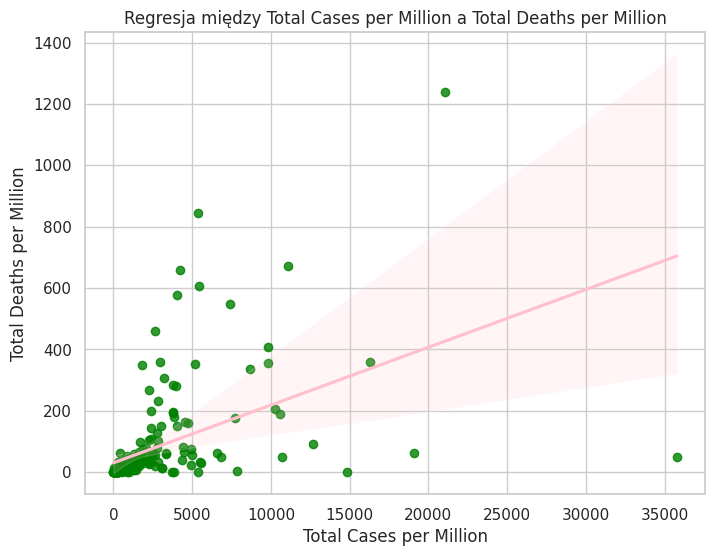

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm', 'population', 'pop_density', 'median_age', 'hosp_beds']

# Użycie loc do wybrania wszystkich wierszy oraz kolumn zdefiniowanych w totvars
covidtotalsonly = df.loc[:, totvars]

# Wyświetlenie wyników
print(covidtotalsonly)

covidtotalsonly['total_cases_q'] = pd.qcut(covidtotalsonly['total_cases'],
                                            q = 5,
                                            labels = ['very low', 'low', 'medium', 'high', 'very high'],
                                            precision = 0)

# Wyświetlenie wyników
print(covidtotalsonly[['total_cases', 'total_cases_q']].head())

covidtotalsonly['total_deaths_q'] = pd.qcut(covidtotalsonly['total_deaths'],
                                            q = 5,
                                            labels = ['very low', 'low', 'medium', 'high', 'very high'],
                                            precision = 0)

# Wyświetlenie wyników
print(covidtotalsonly[['total_deaths', 'total_deaths_q']].head())

# Tworzenie tabeli przestawnej (krzyżowej)
pivot = pd.pivot_table(covidtotalsonly,
 index = 'total_cases_q',
 columns = 'total_deaths_q',
 aggfunc = 'size', fill_value = 0)
print("Tabela przestawna:")
print(pivot)

# Wybranie wierszy, gdzie 'total_cases_q' == 'very high' i 'total_deaths_q' == 'medium'
filtered_data = covidtotalsonly.loc[(covidtotalsonly['total_cases_q'] == 'very high') &
                                    (covidtotalsonly['total_deaths_q'] == 'medium')]

# Transpozycja macierzy
transposed_data = filtered_data.T

# Wyświetlenie wyników
print("Transponowane dane (tylko dla total_cases_q = 'very high' i total_deaths_q = 'medium'):")
print(transposed_data)

# Wybranie wierszy, gdzie 'total_cases_q' == 'low' oraz 'total_deaths_q' == 'high'
filtered_data = covidtotalsonly.loc[(covidtotalsonly['total_cases_q'] == 'low') &
                                (covidtotalsonly['total_deaths_q'] == 'high')]

# Transpozycja macierzy
transposed_data = filtered_data.T

# Wyświetlenie transponowanych danych
print("Transponowane dane (tylko dla total_cases_q = 'low' i total_deaths_q = 'high'):")
print(transposed_data)

# Obliczenie średniej wartości kolumny 'hosp_beds'
hosp_beds_mean = covidtotalsonly['hosp_beds'].mean()
print(f"Średnia wartość kolumny 'hosp_beds': {hosp_beds_mean}")

# Generowanie wykresu regresji dla 'total_cases' i 'total_deaths'
plt.figure(figsize = (8, 6))
sns.regplot(x = 'total_cases', y='total_deaths', data = covidtotalsonly, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'pink'})
plt.xlabel('Total Cases')  # Etykieta osi X
plt.ylabel('Total Deaths')  # Etykieta osi Y
plt.title('Regresja między Total Cases a Total Deaths')  # Tytuł wykresu
plt.show()

# Wybór wierszy, gdzie 'total_cases' < 300000 i 'total_deaths' > 20000, a następnie transpozycja
filtered_data_1 = covidtotalsonly.loc[(covidtotalsonly['total_cases'] < 300000) & (covidtotalsonly['total_deaths'] > 20000)]
transposed_data_1 = filtered_data_1.T  # Transpozycja
print("Transponowane dane (total_cases < 300000 i total_deaths > 20000):")
print(transposed_data_1)

# Wybór wierszy, gdzie 'total_cases' > 300000 i 'total_deaths' < 10000, a następnie transpozycja
filtered_data_2 = covidtotalsonly.loc[(covidtotalsonly['total_cases'] > 300000) & (covidtotalsonly['total_deaths'] < 10000)]
transposed_data_2 = filtered_data_2.T  # Transpozycja
print("Transponowane dane (total_cases > 300000 i total_deaths < 10000):")
print(transposed_data_2)

# Generowanie wykresu regresji dla 'total_cases_pm' i 'total_deaths_pm'
plt.figure(figsize = (8, 6))
sns.regplot(x = 'total_cases_pm', y = 'total_deaths_pm', data = covidtotalsonly, scatter_kws = {'color': 'green'}, line_kws = {'color': 'pink'})
plt.xlabel('Total Cases per Million')  # Etykieta osi X
plt.ylabel('Total Deaths per Million')  # Etykieta osi Y
plt.title('Regresja między Total Cases per Million a Total Deaths per Million')  # Tytuł wykresu
plt.show()